# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform ***feature selection***. 

👇 Run the cell below to load the preprocessed dataset from the *previous challenge 1 - Preprocessing Workflow*.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Run this cell if you
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/clean_dataset.csv")

data.head()


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NoGarage,RFn,Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,0.500000,0.866025
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,0.866025,-0.500000
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-0.866025,-0.500000
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,0.500000,0.866025
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-0.500000,0.866025


## (1) Correlation investigation

❓ Plot a heatmap of the ***Pearson Correlation*** between the columns of the dataset ❓

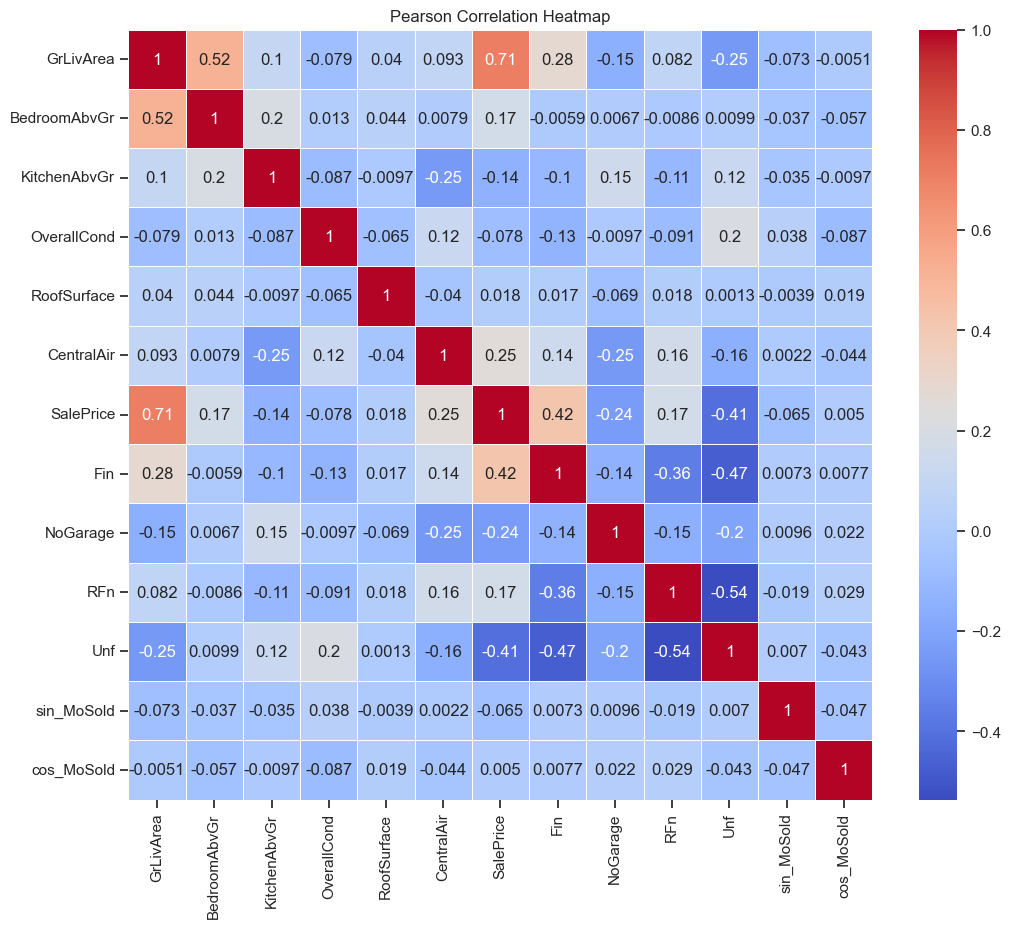

In [20]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()


❓ Visualize the correlation between column pairs in a dataframe ❓

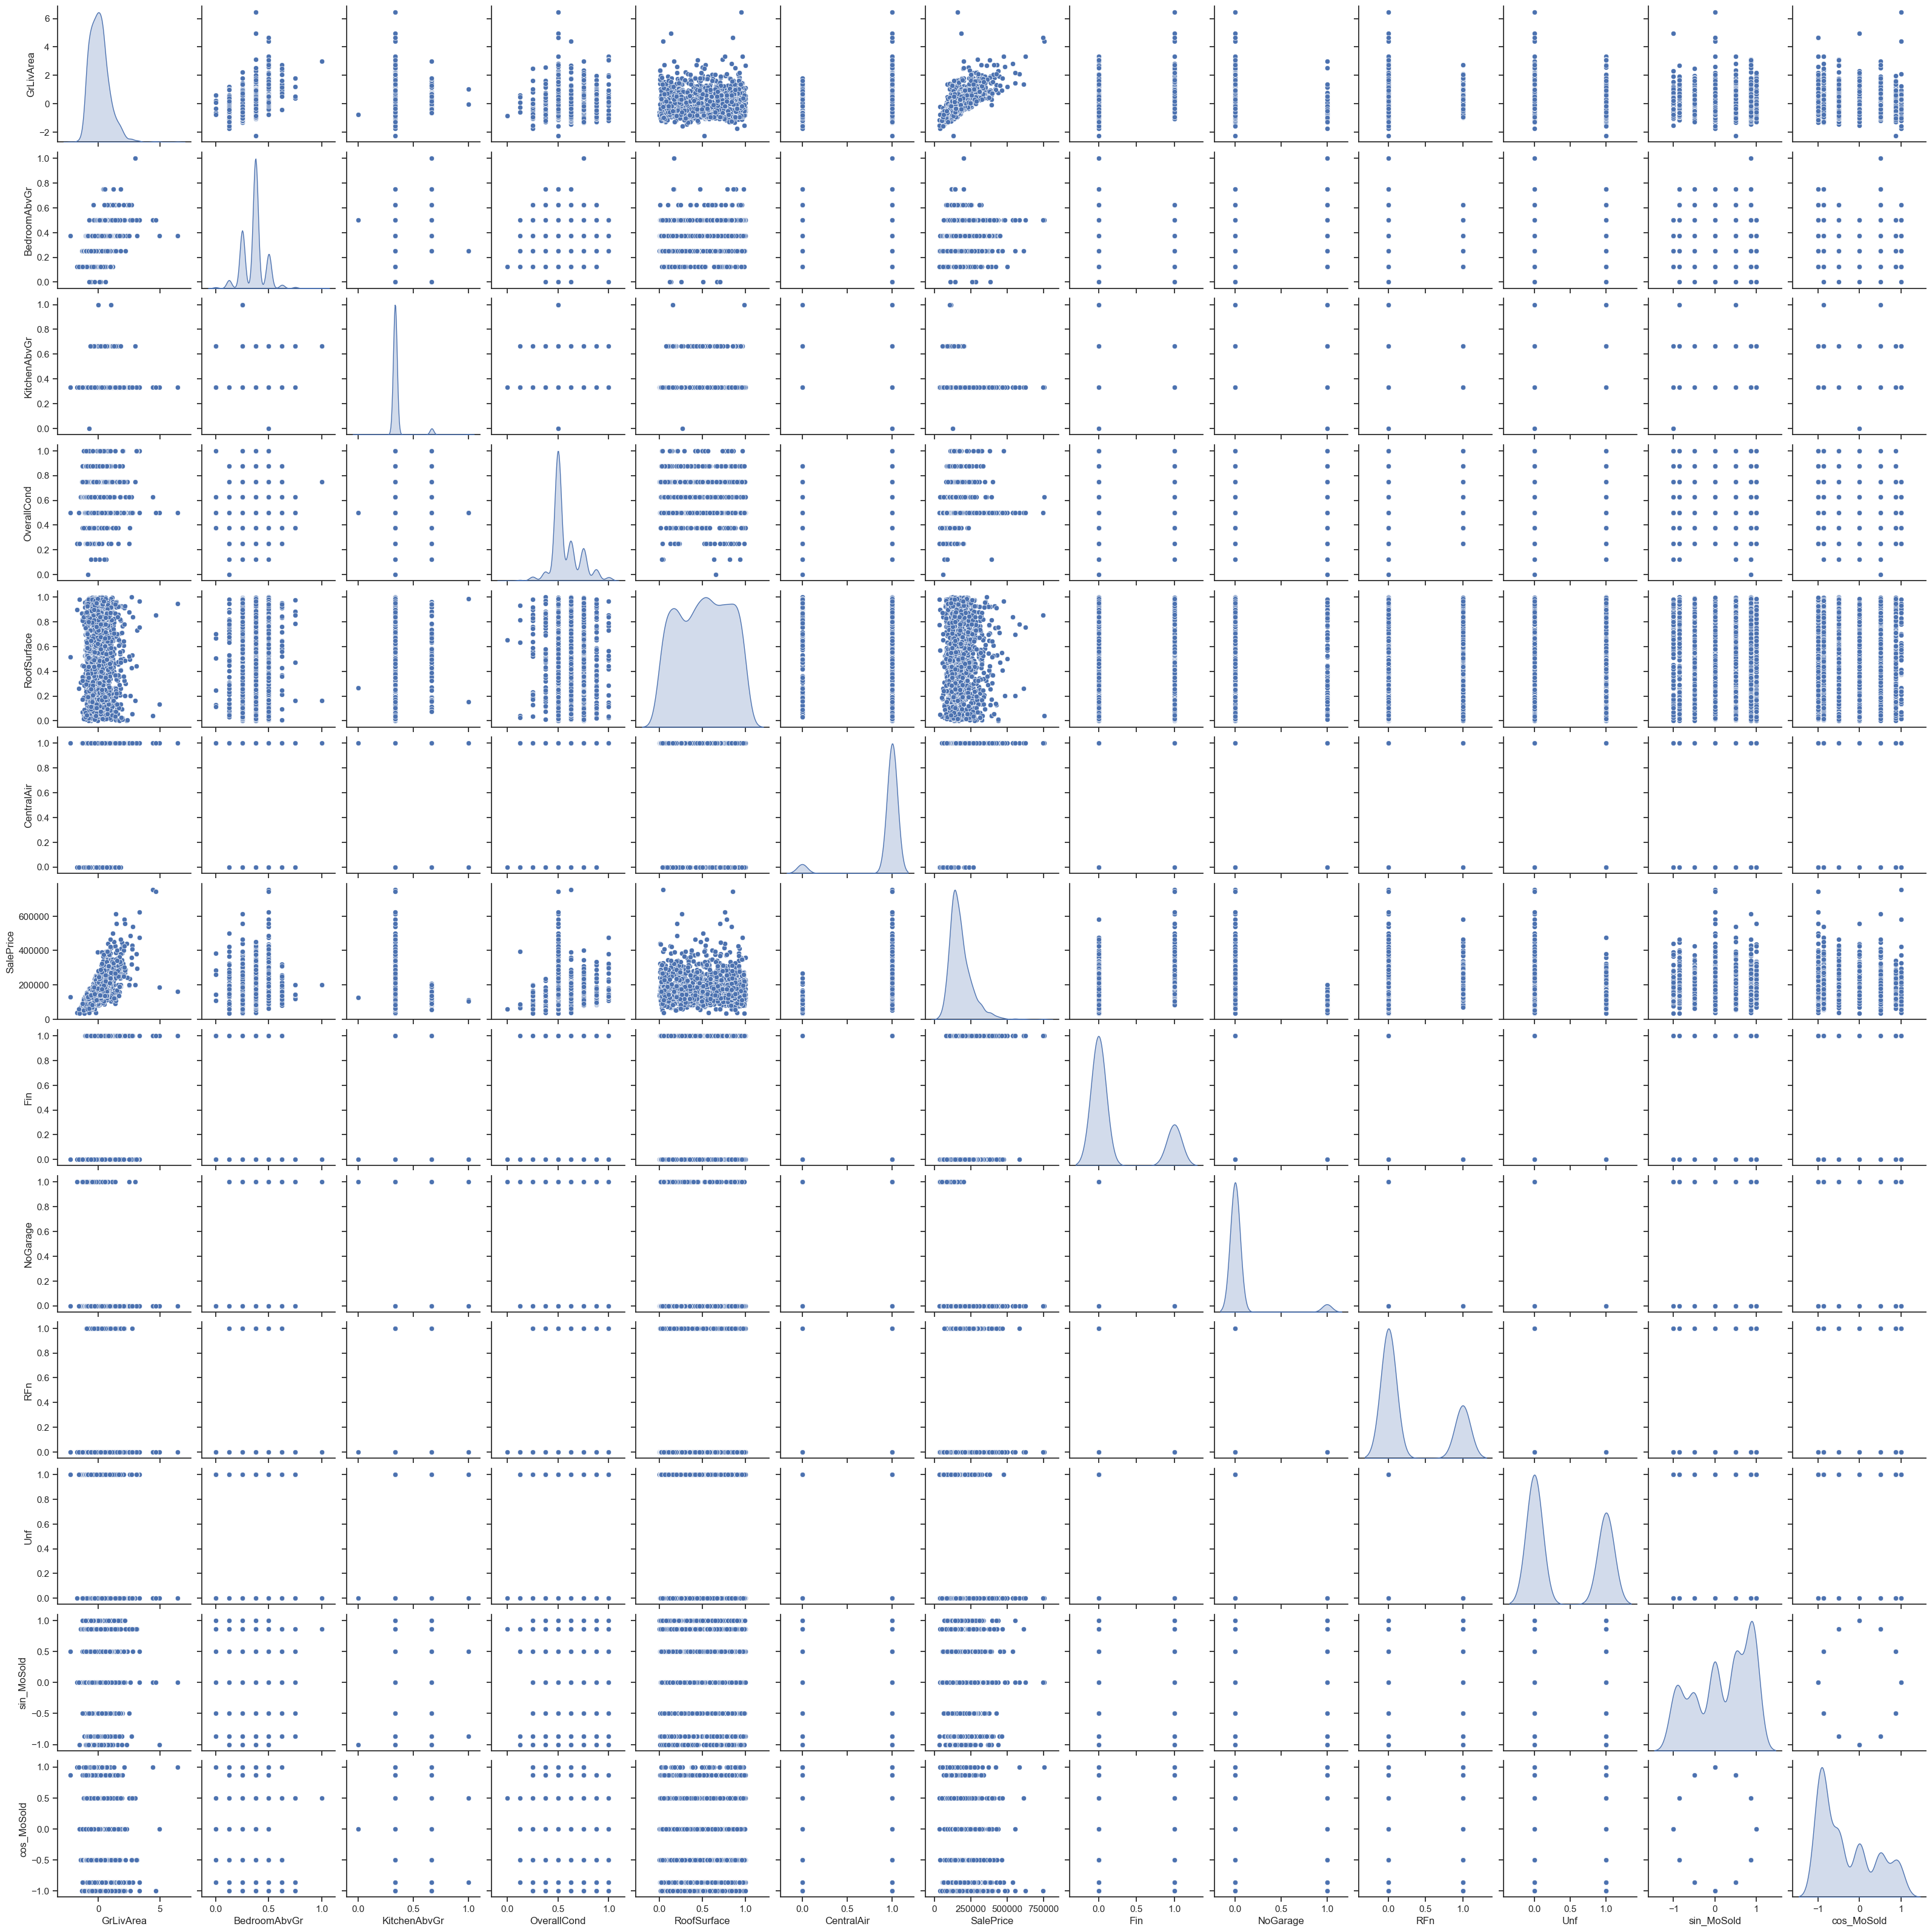

In [21]:
sns.set(style="ticks")
sns.pairplot(data, diag_kind="kde")
plt.show()


❓ How many pairs of features exceed a correlation of 0.9 or -0.9 ❓

*Save your answer as an integer under variable name `correlated_features`*

In [22]:
correlation_matrix = data.corr()

highly_correlated_pairs = (abs(correlation_matrix) > 0.9) & (correlation_matrix != 1)
correlated_features = len(highly_correlated_pairs[highly_correlated_pairs].stack())


🧪 **Test your code**

In [23]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/reecepalmer/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/reecepalmer/Code/RPalmr/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: asyncio-0.19.0, dash-2.14.0, typeguard-2.13.3, anyio-3.6.2, hydra-core-1.3.2
asyncio: mode=strict
collecting ... collected 1 item

test_correlation.py::TestCorrelation::test_correlated_features PASSED    [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master



## (2) Base Modelling

❓ Prepare the feature set `X` and target `y`. ❓

*Remember that we want to model the `SalePrice` with the preprocessed features.*

In [24]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']


❓ Cross validate a Linear Regression model ❓

*Save the score under variable name `base_model_score`.*

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

model = LinearRegression()

base_model_score = cross_val_score(model, X, y, cv=5, scoring='r2').mean()

print(base_model_score)


0.6423122076466542


🧪 **Test your code**

In [26]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/reecepalmer/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/reecepalmer/Code/RPalmr/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: asyncio-0.19.0, dash-2.14.0, typeguard-2.13.3, anyio-3.6.2, hydra-core-1.3.2
asyncio: mode=strict
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



## (3) Feature Permutation

❓ Perform a feature permutation  and rank the features by order of importance. ❓

In [27]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

importance_scores = perm_importance.importances_mean

feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


         Feature    Importance
9            Unf  1.453010e+26
8            RFn  1.215798e+26
6            Fin  1.044816e+26
7       NoGarage  3.243929e+25
0      GrLivArea  9.129097e-01
1   BedroomAbvGr  4.599602e-02
2   KitchenAbvGr  1.380579e-02
5     CentralAir  9.330524e-03
10    sin_MoSold  8.394380e-04
3    OverallCond  2.259349e-04
11    cos_MoSold  9.517846e-05
4    RoofSurface -2.564272e-04


❓ Which feature is the most important ❓

*Save your answer as a `string` under variable name `best_feature`.*

In [28]:
best_feature = "GrLivArea"


🧪 **Test your code**

In [29]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/reecepalmer/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/reecepalmer/Code/RPalmr/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: asyncio-0.19.0, dash-2.14.0, typeguard-2.13.3, anyio-3.6.2, hydra-core-1.3.2
asyncio: mode=strict
collecting ... collected 1 item

test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master



## (4) Modelling with less complexity

❓ Drop the weak features and cross-validate a new model ❓

* You should aim at maintaining a score close to the previous one. 
* Save the score under variable name `simplified_model_score`.

<details>
    <summary>💡 Hint</summary>
    
You can try dropping features one by one starting from the ones lowest importance until your model score starts dropping significantly.
</details>

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

def cross_validate_model(X, y, model, cv=5):
    return cross_val_score(model, X, y, cv=cv, scoring='r2').mean()

original_score = cross_validate_model(X, y, LinearRegression())

sorted_feature_names = feature_names[sorted_indices]

simplified_X = X.copy()

for feature_name in sorted_feature_names:
    simplified_X = simplified_X.drop(columns=[feature_name])

    simplified_model_score = cross_validate_model(simplified_X, y, LinearRegression())

    # Check if the score is significantly lower
    if simplified_model_score < (original_score - 0.01):
        break

print("Simplified Model Score:", simplified_model_score)


NameError: name 'sorted_indices' is not defined

🧪 **Test your code**

In [31]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())


NameError: name 'simplified_model_score' is not defined

P.S. Do you remember your score before preprocessing from Challenge #1? How is it different after preprocessing?

🏁 Congratulations! Now, you know a bit more how to do ***feature selection*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!